![title](UCN.png)

 #  <font color='#7E9BC0'> Travel Salesman Problem - Nearest Neighbor. </font>

<div class="alert alert-info"> </h4> **Material preparado para la carrera de Ingeniería Civil Industrial | Universidad Católica del Norte | Escuela de Ingeniería - Campus Coquimbo | Curso - Cadena de Suministros.**
</h4> </div>


## El Algoritmo del vecino más próximo
Fuente: https://es.wikipedia.org/wiki/Problema_del_viajante


El Algoritmo del vecino más próximo (NN por sus siglas en inglés - Nearest Neighbor) permite al viajante elegir la ciudad no visitada más cercana como próximo movimiento. Este algoritmo retorna rápidamente una ruta corta. Para N ciudades aleatoriamente distribuidas en un plano, el algoritmo en promedio, retorna un camino de un 25% más largo que el menor camino posible para instancias que satisfacen la desigualdad triangular. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 11
ciudades = [i for i in range(n)]
arcos = [(i,j) for i in ciudades for j in ciudades if i!=j]

In [3]:
ciudades

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [4]:
rnd = np.random
rnd.seed(0)
coord_x = rnd.rand(n)*100
coord_y = rnd.rand(n)*100
coord_x

array([ 54.88135039,  71.51893664,  60.27633761,  54.4883183 ,
        42.36547993,  64.58941131,  43.75872113,  89.17730008,
        96.36627605,  38.34415188,  79.17250381])

In [5]:
distancia = {(i,j): np.hypot(coord_x[i]-coord_x[j], coord_y[i]-coord_y[j]) for i,j in arcos}

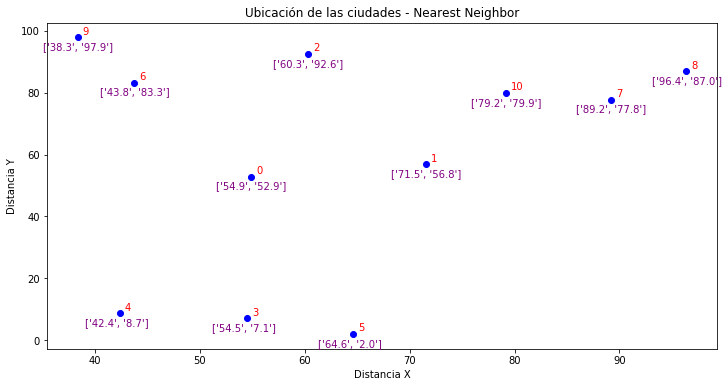

In [6]:
import matplotlib.pyplot as plt
x=coord_x
y=coord_y

plt.figure(figsize=(12,6))
plt.scatter(x,y,color='blue')

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Ubicación de las ciudades - Nearest Neighbor")

s=[]
for n in range(len(coord_x)):
    s_temp=[]
    s_temp.append("%.1f" %coord_x[n])
    s_temp.append("%.1f" %coord_y[n])
    s.append(s_temp)

for n in range(len(coord_x)):
    plt.annotate(str(s[n]), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]-3.3,coord_y[n]-4), 
                 color='purple')
    
for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='red')

plt.show()

In [7]:
starting_node=5
NN=[starting_node]
while len(NN)<=n:
    k=NN[-1]
    nn={(k,j): distancia[(k,j)] for j in ciudades if j!=k and j not in NN}
    nn.items()
    new=min(nn.items(), key=lambda x: x[1]) 
    NN.append(new[0][1])
NN.append(starting_node)
NN

[5, 3, 4, 0, 1, 10, 7, 8, 2, 6, 9, 5]

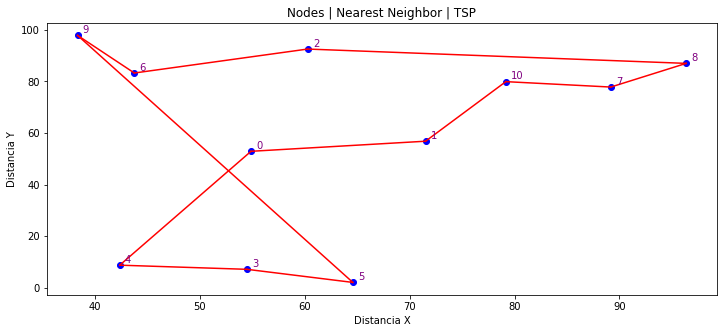

In [8]:
# Graficar las líneas
x=coord_x
y=coord_y

plt.figure(figsize=(12,5))
plt.scatter(x,y,color='blue')


for n in range(len(NN)-1):
    plt.plot([coord_x[NN[n]],coord_x[NN[n+1]]], [coord_y[NN[n]], coord_y[NN[n+1]]],
                 color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')

plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.show()

In [9]:
# All
All_sol=[]
for z in range(n+1):
    starting_node=ciudades[z]
    NN=[starting_node]
    while len(NN)<=n:
        k=NN[-1]
        nn={(k,j): distancia[(k,j)] for j in ciudades if j!=k and j not in NN}
        nn.items()
        new=min(nn.items(), key=lambda x: x[1]) 
        NN.append(new[0][1])
        
    NN.append(starting_node)
    All_sol.append(NN)

In [10]:
All_sol

[[0, 1, 10, 7, 8, 2, 6, 9, 4, 3, 5, 0],
 [1, 0, 6, 9, 2, 10, 7, 8, 3, 5, 4, 1],
 [2, 6, 9, 10, 7, 8, 1, 0, 3, 5, 4, 2],
 [3, 5, 4, 0, 1, 10, 7, 8, 2, 6, 9, 3],
 [4, 3, 5, 0, 1, 10, 7, 8, 2, 6, 9, 4],
 [5, 3, 4, 0, 1, 10, 7, 8, 2, 6, 9, 5],
 [6, 9, 2, 10, 7, 8, 1, 0, 3, 5, 4, 6],
 [7, 10, 8, 2, 6, 9, 0, 1, 3, 5, 4, 7],
 [8, 7, 10, 2, 6, 9, 0, 1, 3, 5, 4, 8],
 [9, 6, 2, 10, 7, 8, 1, 0, 3, 5, 4, 9],
 [10, 7, 8, 2, 6, 9, 0, 1, 3, 5, 4, 10]]

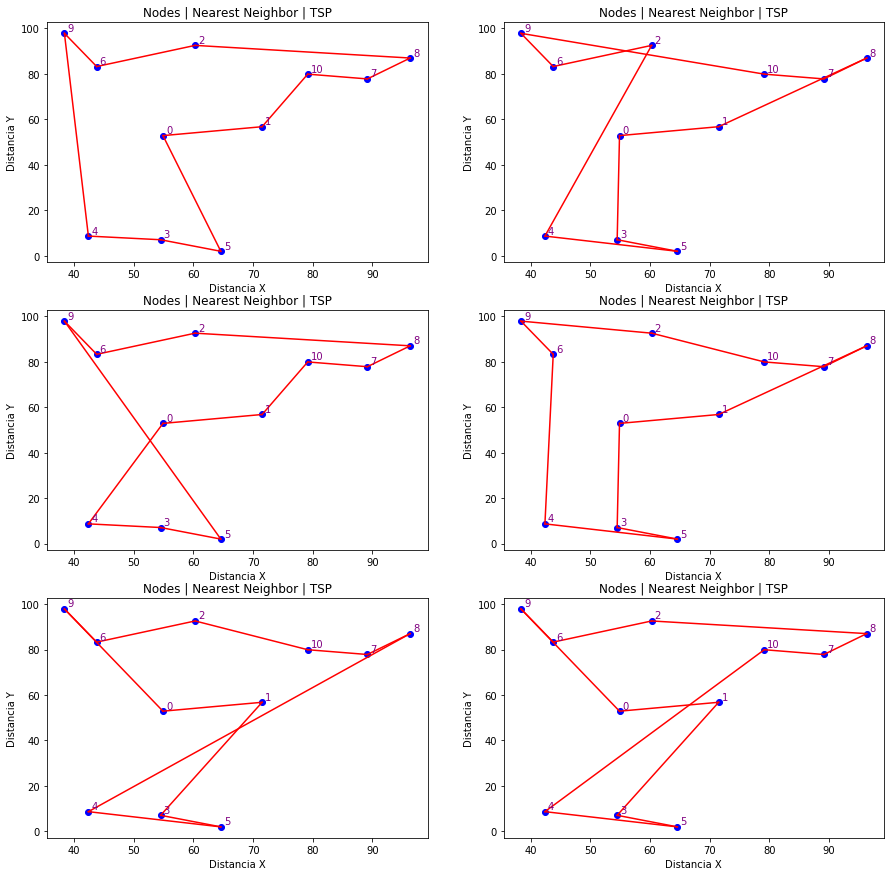

In [11]:
plt.figure(figsize=(15,15))


plt.subplot(3, 2, 1)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[0])-1):
    
    coordx=All_sol[0]
    coordy=All_sol[0]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.subplot(3, 2, 2)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[2])-1):
    
    coordx=All_sol[2]
    coordy=All_sol[2]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.subplot(3, 2, 3)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[5])-1):
    
    coordx=All_sol[5]
    coordy=All_sol[5]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.subplot(3, 2, 4)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[6])-1):
    
    coordx=All_sol[6]
    coordy=All_sol[6]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.subplot(3, 2, 5)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[8])-1):
    
    coordx=All_sol[8]
    coordy=All_sol[8]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")

plt.subplot(3, 2, 6)
x=coord_x
y=coord_y
plt.scatter(x,y,color='blue')
for n in range(len(All_sol[10])-1):
    
    coordx=All_sol[10]
    coordy=All_sol[10]
    plt.plot([coord_x[coordx[n]],coord_x[coordx[n+1]]] ,[coord_y[coordy[n]],coord_y[coordy[n+1]]],color ='red')

for n in range(len(coord_x)):
    plt.annotate(str(n), xy=(coord_x[n],coord_y[n] ), xytext=(coord_x[n]+0.5,coord_y[n]+1),
                 color='purple')
plt.xlabel("Distancia X")
plt.ylabel("Distancia Y")
plt.title("Nodes | Nearest Neighbor | TSP")
plt.savefig('NN Grafico.png')
plt.show()